Imports

In [1]:
import numpy as np
import pandas as pd

import torch                                        # root package
from torch.utils.data import Dataset, DataLoader    # dataset representation and loading

Neural Network API

In [2]:
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural network functionality
import torch.nn.functional as F           # functional programming tools: layers, activations and more
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.
#from torch.jit import script, trace       # hybrid frontend decorator and tracing jit

GPU Usage

In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device") # here are some commented lines for change test 

Using cuda device


Path to patient directory: C:/Users/fahim/Documents/Research_project/F2NetViT/Dataset/BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/BraTS-GLI-02175-101
Path to label: C:/Users/fahim/Documents/Research_project/F2NetViT/Dataset/BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/BraTS-GLI-02175-101\BraTS-GLI-02175-101-seg.nii.gz
torch.Size([1, 4, 182, 182, 218]) torch.Size([1, 3, 182, 182, 218])


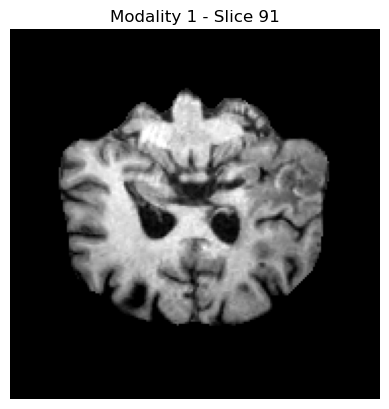

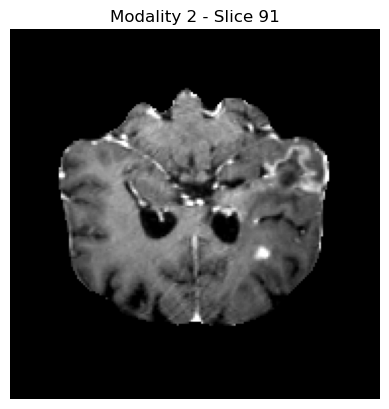

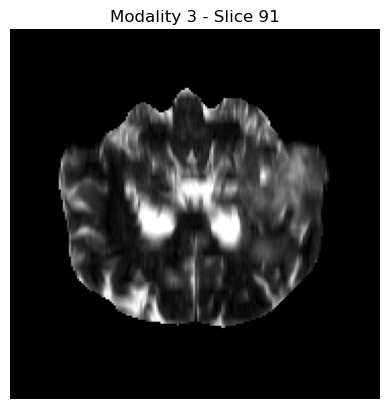

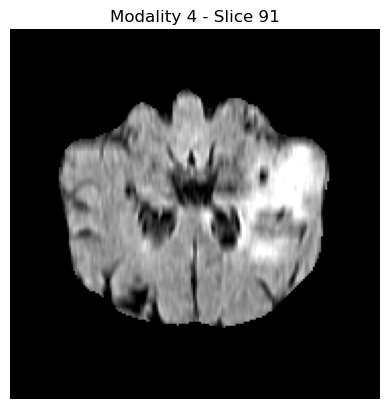

In [10]:
from Data.data_provider_brats import data_loader_3D 
from config.reader import read_config
import os
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Configuration file path
cfg_path = r'C:\Users\fahim\Documents\Research_project\F2NetViT\config\config.yaml'
# Configuration file path
# Read configuration
config = read_config(cfg_path)

# Create dataset
train_dataset = data_loader_3D(cfg_path, mode='train', modality=4, multimodal=True, site=None, image_downsample=config['Network']['image_downsample'])
val_dataset = data_loader_3D(cfg_path, mode='valid', modality=4, multimodal=True, site=None, image_downsample=config['Network']['image_downsample'])

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=config['Network']['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config['Network']['batch_size'], shuffle=False)

# Function to visualize a slice from the 3D image
def show_slice(img, title=None):
    plt.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Example of checking data loading and visualizing a slice
for images, labels in train_loader:
    print(images.shape, labels.shape)
    
    # Convert from torch tensor to numpy array
    img_np = images[0].numpy()  # Taking the first image in the batch
    label_np = labels[0].numpy()  # Taking the first label in the batch

    # Choose a slice from the 3D image (e.g., middle slice)
    slice_idx = img_np.shape[2] // 2

    # Display the slice
    for modality in range(img_np.shape[0]):
        show_slice(img_np[modality, :, :, slice_idx], title=f'Modality {modality+1} - Slice {slice_idx}')
    
    break  # Just visualize one batch for demonstration


CROPPING AND PADDING. 

If your images are not of the same size, you might need to crop or pad them to a consistent size.